In [1]:
# Load the Pandas libraries with alias 'pd' 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("winequalityN.csv") 
print (data.shape)
data = data.dropna()
print (data.shape)

(6497, 13)
(6463, 13)


In [2]:
## Replacing categorical variale wine type white to 0 and red to 1
data = data.replace('white', 0)
data = data.replace('red', 1)
#print (data.shape)

## Divide data into data and lael
#winedata = data.drop(['quality'],axis=1)
#print (wineData)
winequality_df = data['quality']
#print (wineQuality_index)
winedata_df = data
winedata_df.describe()
#winequality.describe

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.246480,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Text(0.5, 1.0, 'Correlation between variables')

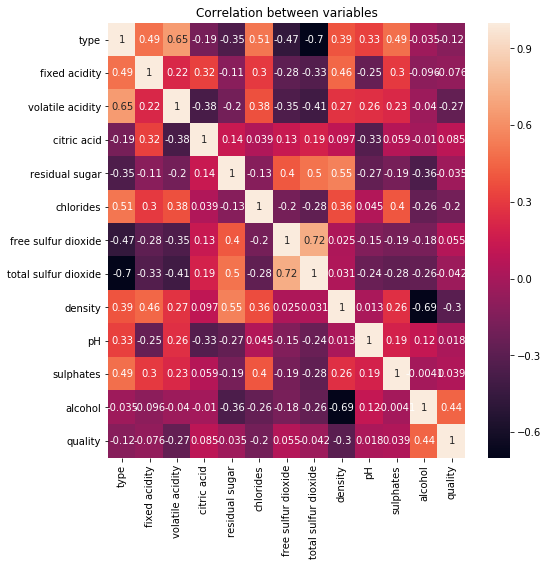

In [3]:
corr = winedata_df.corr()
fig, ax = plt.subplots(figsize = (8,8))
corrplot = sns.heatmap(corr, annot= True)
ax.set_title('Correlation between variables')

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


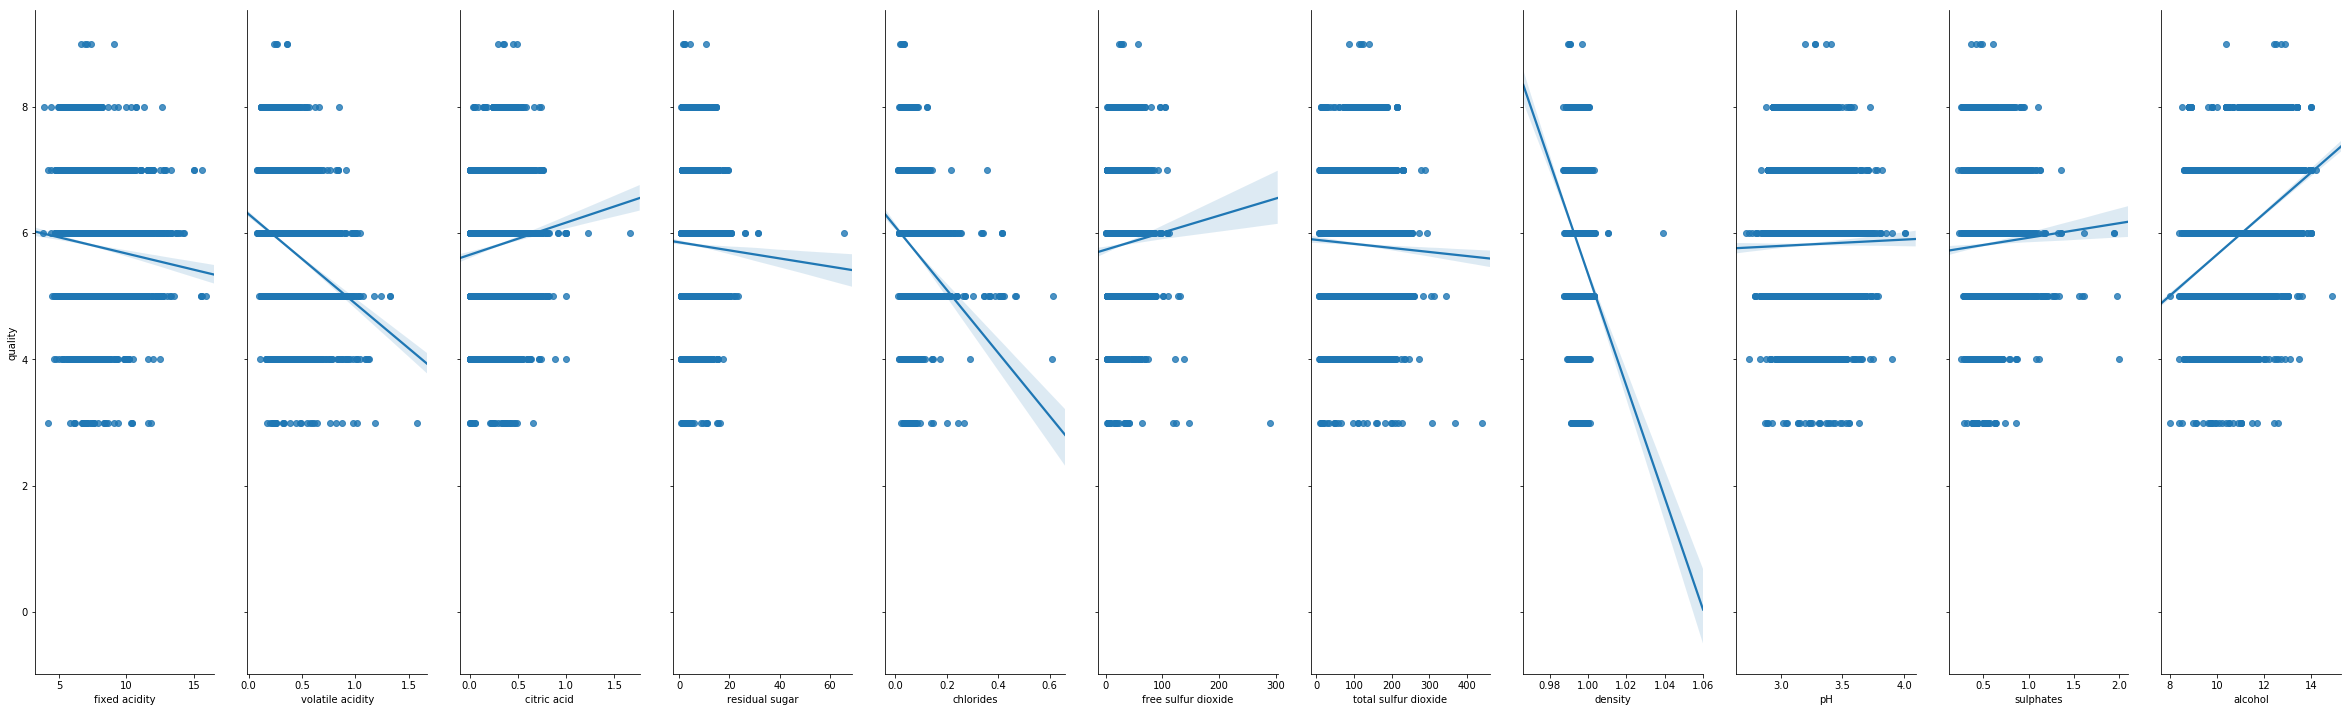

In [4]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x = winedata_df[features]
y = winedata_df['quality']
#plotting features vs quality
sns.pairplot(winedata_df,x_vars=features,y_vars='quality',kind='reg',size=10,aspect=0.3)

# (1) Linear Regression Fitting

In [5]:
winedata = winedata_df.drop(['quality'],axis=1)
#print (winedata)
winedata = winedata.values
#print (winedata)
winequality = winequality_df.values.reshape(-1,1)
print (winequality)
## Divide data in traning and test sets
X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state=1)
print ((X_train.shape), len(X_test),len(y_train), len(y_test))

[[6]
 [6]
 [6]
 ...
 [6]
 [5]
 [6]]
(5170, 12) 1293 5170 1293


In [6]:
##Standardize the data 
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

#print (type(y_train), type(y_test))
print (y_train.shape, y_test.shape)

(5170, 1) (1293, 1)


In [7]:
#fitting data into linear regression model
reg = LinearRegression()
reg = reg.fit(X_train_transform,y_train)

pred_y = reg.predict(X_test_transform)
#mse = mean_squared_error(X_test, pred_y)
print (pred_y.shape)

#plt.scatter(X_test[:,1], y_test,color="red")
#plt.show()
#plt.scatter(X_test[:,1], pred_y, color="green", linewidth = 3)
#plt.show()

coeff = reg.coef_
coeff = np.reshape(coeff, [12,1])
coeff = pd.DataFrame( data = coeff, index = ['type','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], columns = ['coefficient'] )
coeff


intercept = reg.intercept_
print(intercept)
coeff

(1293, 1)
[5.81663443]


,coefficient
type,0.152474
fixed acidity,0.110208
volatile acidity,-0.254844
citric acid,-0.012826
residual sugar,0.276331
chlorides,-0.024269
free sulfur dioxide,0.085453
total sulfur dioxide,-0.073995
density,-0.297435
pH,0.079284


Text(0, 0.5, 'Predictions')

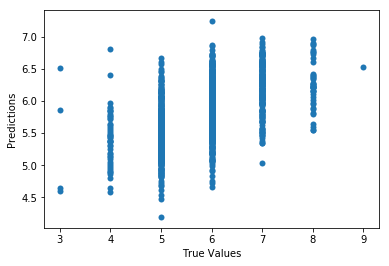

In [8]:
## The line / model
plt.scatter(y_test, pred_y, linewidth = 0.0001)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))
#print(y_test.shape)
ydata = np.append( (y_test), (pred_y), axis = 1)
print(ydata.shape)
df = pd.DataFrame(ydata,columns = ['y_test', 'predicted_y'])
#print (df.head(20))
x = np.linspace(0,1293,num = 1293,endpoint=True)
#plt.scatter(x, y_test ,color="green", linewidth =1 )
#plt.show()
#plt.scatter(x, y_test ,color="red", linewidth = 1 )
#plt.show()

Mean Absolute Error: 0.7793787220447564
Mean Squared Error: 0.9619627444645652
Root Mean Squared Error: 0.9807969945226
(1293, 2)


In [69]:
test_score = reg.score(X_test, y_test)
train_score = reg.score(X_train, y_train)
print('Test_score: {:.2f}'.format(test_score))

print('Train_score: {:.2f}'.format(train_score))

Test_score: 0.34
Train_score: 0.29


# (2)Polynormial Regression Fitting

In [77]:

X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 3)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = PolynomialFeatures(degree = 3)
lg = LinearRegression()
lg.fit(X_train,y_train)
predicted_y = lg.predict(X_test)
#print (X_test, predicted_y, y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))




Mean Absolute Error: 0.7793787220447564
Mean Squared Error: 0.9619627444645652
Root Mean Squared Error: 0.9807969945226


In [72]:
ydata = np.append( (y_test), (pred_y), axis = 1)
print(ydata.shape)
df = pd.DataFrame(ydata,columns = ['y_test', 'predicted_y'])
#print (df.head(20))
x = np.linspace(0,1293,num = 1293,endpoint=True)

(1293, 2)


Text(0, 0.5, 'Predictions')

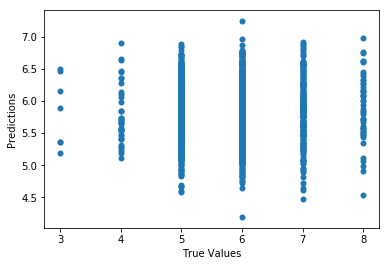

In [13]:
plt.scatter(y_test, pred_y, linewidth = 0.0001)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# (3) Ridge Regression Fitting

In [75]:
X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
RR = Ridge(alpha = 100)
RR.fit(X_train,y_train)
predicted_y = RR.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))


Mean Absolute Error: 0.8000364812231824
Mean Squared Error: 0.9928636378342882
Root Mean Squared Error: 0.9964254301423103


In [74]:
ydata = np.append( (y_test), (pred_y), axis = 1)
print(ydata.shape)
df = pd.DataFrame(ydata,columns = ['y_test', 'predicted_y'])
#print (df.head(20))
x = np.linspace(0,1293,num = 1293,endpoint=True)

(1293, 2)


In [16]:
test_score = RR.score(X_test, y_test)
train_score = RR.score(X_train, y_train)
print('Test_score: {:.2f}'.format(test_score))

print('Train_score: {:.2f}'.format(train_score))

Test_score: 0.33
Train_score: 0.29


In [17]:
coeff = RR.coef_
coeff = np.reshape(coeff, [12,1])
coeff = pd.DataFrame( data = coeff, index = ['type','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], columns = ['coefficient'] )
coeff

,coefficient
type,0.124857
fixed acidity,0.053168
volatile acidity,-0.254557
citric acid,-0.008094
residual sugar,0.218434
chlorides,-0.032502
free sulfur dioxide,0.074121
total sulfur dioxide,-0.067965
density,-0.184050
pH,0.058800


Text(0, 0.5, 'Predictions')

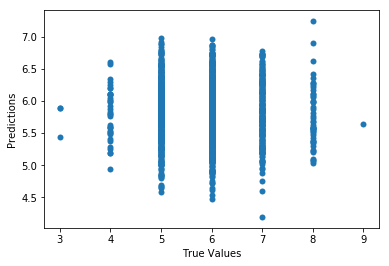

In [18]:
plt.scatter(y_test, pred_y, linewidth = 0.0001)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# cross validation for Ridge Regression

In [19]:
cv_results = cross_validate(RR, winedata, winequality, cv=3)
cv_results

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00241899, 0.00125504, 0.001086  ]),
 'score_time': array([0.00051093, 0.00034571, 0.00041294]),
 'test_score': array([0.18209569, 0.28679245, 0.2166377 ]),
 'train_score': array([0.31013845, 0.25590619, 0.26045597])}

# (4) Lasso Regression Fitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LR = Lasso(alpha = 0.0001)
LR.fit(X_train,y_train)
predicted_y = LR.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

Mean Absolute Error: 0.8000364812231824
Mean Squared Error: 0.9928636378342882
Root Mean Squared Error: 0.9964254301423103


In [21]:
test_score = LR.score(X_test, y_test)
train_score = LR.score(X_train, y_train)
print('Test_score: {:.2f}'.format(test_score))

print('Train_score: {:.2f}'.format(train_score))

Test_score: 0.34
Train_score: 0.29


In [22]:
coeff = LR.coef_
coeff = np.reshape(coeff, [12,1])
coeff = pd.DataFrame( data = coeff, index = ['type','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], columns = ['coefficient'] )
coeff

,coefficient
type,0.168361
fixed acidity,0.089796
volatile acidity,-0.264264
citric acid,-0.011206
residual sugar,0.287983
chlorides,-0.027722
free sulfur dioxide,0.071191
total sulfur dioxide,-0.059131
density,-0.281073
pH,0.079926


In [23]:
ydata = np.append( (y_test), (pred_y), axis = 1)
print(ydata.shape)
df = pd.DataFrame(ydata,columns = ['y_test', 'predicted_y'])
print (df.head(20))
x = np.linspace(0,1293,num = 1293,endpoint=True)

(1293, 2)
    y_test  predicted_y
0      6.0     6.271987
1      5.0     5.933933
2      6.0     5.437109
3      4.0     5.383408
4      7.0     6.407959
5      6.0     5.110375
6      6.0     5.277709
7      7.0     6.092118
8      5.0     5.832901
9      7.0     5.278542
10     5.0     6.043993
11     6.0     5.214680
12     4.0     5.250292
13     7.0     6.267225
14     5.0     5.624007
15     5.0     5.476394
16     6.0     5.673419
17     6.0     6.066388
18     5.0     6.448018
19     6.0     5.677642


Text(0, 0.5, 'Predictions')

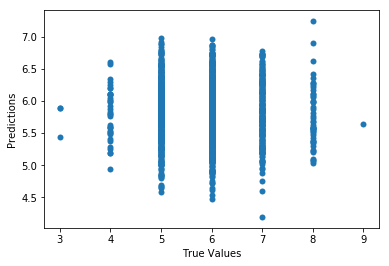

In [24]:
plt.scatter(y_test, pred_y, linewidth = 0.0001)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# cross validate for Lasso Regression

In [25]:
cv_results = cross_validate(LR, winedata, winequality, cv=3)
cv_results

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00608611, 0.00386214, 0.00265598]),
 'score_time': array([0.00044584, 0.00042605, 0.00054193]),
 'test_score': array([0.19999848, 0.29672229, 0.03303653]),
 'train_score': array([0.32952454, 0.27776389, 0.28570141])}

# (5)Visilization of regression model

(1, 12)


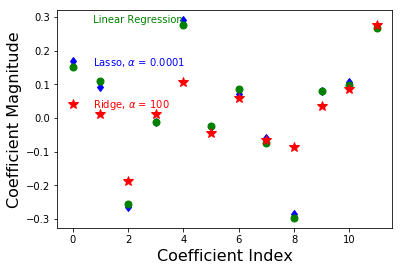

,coefficient
type,0
fixed acidity,1
volatile acidity,2
citric acid,3
residual sugar,4
chlorides,5
free sulfur dioxide,6
total sulfur dioxide,7
density,8
pH,9


In [65]:
index = ['type','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
index_df = pd.DataFrame([0,1,2,3,4,5,6,7,8,9,10,11], index, columns = ['coefficient'])

x_index = np. reshape(np.linspace(0,11, num = 12), [1,12])

print(x_index.shape)

plt.plot(x_index, RR.coef_,linestyle='none',marker='*',markersize=10,color='red', zorder=7) # zorder for ordering the markers
plt.plot(x_index, np.reshape((LR.coef_),[1,12]),linestyle='none',marker='d',markersize=6,color='blue') # alpha here is for transparency
plt.plot(x_index, reg.coef_,linestyle='none',marker='o',markersize=7,color='green')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
#plt.legend(fontsize=13,loc=5)
plt.text(0.05, 0.2,' Ridge, $\u03B1$ = 100',
         color='red',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.text(0.05, 0.4,' Linear Regression',
          color='green',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.text(0.05, 0.3,' Lasso, $\u03B1$ = 0.0001',
          color='blue',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.show()

index_df

In [105]:
index_df = ['type','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
#index_df = pd.DataFrame([0,1,2,3,4,5,6,7,8,9,10,11], index, columns = ['coefficient'])

#rrcoef_df = pd.DataFrame(np.reshape((RR.coef_),[12,1]), index = index_df, columns = ['Ridge'])
rrcoef_df = pd.DataFrame(np.reshape((RR.coef_),[12,1]),  columns = ['Ridge'])


#lrcoef_df = pd.DataFrame(np.reshape((LR.coef_),[12,1]), index = index_df, columns = ['Lasso'])

#linearcoef_df =pd.DataFrame(np.reshape((reg.coef_),[12,1]), index = index_df, columns = ['Linear'])

coeff_df = rrcoef_df 
coeff_df['Lasso $\u03B1$ =100'] = np.reshape((LR.coef_),[12,1])
coeff_df['Linear $\u03B1$ = 0.0001'] = np.reshape((reg.coef_),[12,1])
coeff_df
#df = sns.load_dataset("df")
#sns.scatterplot(x = , y = coeff_df.values[:,0], data=df)
#sns.scatterplot(coeff_df, x="index", y="Ridge")


,Ridge,Lasso $α$ =100,Linear $α$ = 0.0001
0,0.124857,0.169745,0.152474
1,0.053168,0.091592,0.110208
2,-0.254557,-0.264411,-0.254844
3,-0.008094,-0.011393,-0.012826
4,0.218434,0.290819,0.276331
5,-0.032502,-0.027709,-0.024269
6,0.074121,0.071332,0.085453
7,-0.067965,-0.059151,-0.073995
8,-0.184050,-0.285260,-0.297435
9,0.058800,0.080946,0.079284


# Compare different alpha for Ridge model 

In [147]:
X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
RR = Ridge(alpha = 1)
RR.fit(X_train,y_train)
predicted_y = RR.predict(X_test)
coeff1 = RR.coef_
print ("1", coeff1)

RR = Ridge(alpha = 0)
RR.fit(X_train,y_train)
predicted_y = RR.predict(X_test)
coeff0 = RR.coef_
print ('0',coeff0)

RR = Ridge(alpha = 50)
RR.fit(X_train,y_train)
predicted_y = RR.predict(X_test)
coeff50 = RR.coef_
print ('50',coeff50)

RR = Ridge(alpha = 80)
RR.fit(X_train,y_train)
predicted_y = RR.predict(X_test)
coeff80 = RR.coef_
print ('80', coeff80)

RR = Ridge(alpha = 100)
RR.fit(X_train,y_train)
predicted_y = RR.predict(X_test)
coeff100 = RR.coef_
print ('100', coeff100)

RR = Ridge(alpha = 1000)
RR.fit(X_train,y_train)
predicted_y = RR.predict(X_test)
coeff1000 = RR.coef_
print ('1000', coeff1000)

1 [[ 0.1690339   0.09091386 -0.26432518 -0.01136584  0.28959646 -0.02777887
   0.07139979 -0.0593053  -0.28346927  0.08055283  0.10783664  0.27167914]]
0 [[ 0.16974459  0.09159171 -0.26441108 -0.0113928   0.29081936 -0.02770928
   0.07133167 -0.05915068 -0.28526001  0.08094627  0.10794231  0.27102691]]
50 [[ 0.14240418  0.06699935 -0.25965982 -0.0098342   0.24544159 -0.03051167
   0.07347354 -0.06481848 -0.22035818  0.06672755  0.10407673  0.29320193]]
80 [[ 0.13112289  0.05790544 -0.2566065  -0.00879718  0.22786765 -0.03176877
   0.07397488 -0.06690483 -0.19645323  0.06150799  0.1026044   0.300184  ]]
100 [[ 0.12485733  0.05316771 -0.25455662 -0.00809397  0.21843379 -0.03250181
   0.07412083 -0.06796505 -0.18405042  0.05879986  0.10181425  0.30337358]]
1000 [[ 0.04132023  0.0113542  -0.18888545  0.01327904  0.10676491 -0.04555789
   0.0584436  -0.06447181 -0.08636006  0.03432928  0.08687952  0.2759438 ]]


In [148]:
rcoef_df = pd.DataFrame(np.reshape(coeff1,[12,1]),  columns = ['$\u03B1$ =1'])


#lrcoef_df = pd.DataFrame(np.reshape((LR.coef_),[12,1]), index = index_df, columns = ['Lasso'])

#linearcoef_df =pd.DataFrame(np.reshape((reg.coef_),[12,1]), index = index_df, columns = ['Linear'])

coeff_df = rcoef_df 
coeff_df['$\u03B1$ =50'] = np.reshape(coeff50,[12,1])
coeff_df['$\u03B1$ = 100'] = np.reshape(coeff100,[12,1])
coeff_df['$\u03B1$ = 1000'] = np.reshape(coeff1000,[12,1])
coeff_df['$\u03B1$ = 0'] = np.reshape(coeff0,[12,1])
coeff_df['LinearRegression'] = np.reshape(reg.coef_,[12,1])
coeff_df
#df = sns.load_dataset("df")
#sns.scatterplot(x = , y = coeff_df.values[:,0], data=df)
#sns.scatterplot(coeff_df, x="index", y="Ridge")



,$α$ =1,$α$ =50,$α$ = 100,$α$ = 1000,$α$ = 0,LinearRegression
0,0.169034,0.142404,0.124857,0.041320,0.169745,0.152474
1,0.090914,0.066999,0.053168,0.011354,0.091592,0.110208
2,-0.264325,-0.259660,-0.254557,-0.188885,-0.264411,-0.254844
3,-0.011366,-0.009834,-0.008094,0.013279,-0.011393,-0.012826
4,0.289596,0.245442,0.218434,0.106765,0.290819,0.276331
5,-0.027779,-0.030512,-0.032502,-0.045558,-0.027709,-0.024269
6,0.071400,0.073474,0.074121,0.058444,0.071332,0.085453
7,-0.059305,-0.064818,-0.067965,-0.064472,-0.059151,-0.073995
8,-0.283469,-0.220358,-0.184050,-0.086360,-0.285260,-0.297435
9,0.080553,0.066728,0.058800,0.034329,0.080946,0.079284


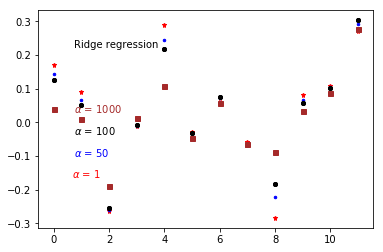

In [120]:
plt.plot(x_index, np.reshape(coeff1, [1,12]),linestyle='none',marker='*',markersize=5,color='red', zorder=7)

plt.plot(x_index, coeff50,linestyle='none',marker='.',markersize=5,color='blue', zorder=7)

plt.plot(x_index, coeff100,linestyle='none',marker='8',markersize=5,color='black', zorder=7)
plt.plot(x_index, coeff1000,linestyle='none',marker='s',markersize=5,color='brown', zorder=7)

plt.text(0.001, 0.001, '$\u03B1$ = 1',
         color='red',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)

plt.text(0.005, 0.05,'$\u03B1$ = 50',
          color='blue',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)

plt.text(0.005, 0.1,'$\u03B1$ = 100',
          color='black',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.text(0.005, 0.15,'$\u03B1$ = 1000',
          color='brown',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.text(0.005, 0.3,'Ridge regression',
          color='black',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.show()

# Compare different alpha for Lasso model 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LR = Lasso(alpha = 0.0001)
LR.fit(X_train,y_train)
predicted_y = LR.predict(X_test)
coeff1 = LR.coef_
print ("1", coeff1)


X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LR = Lasso(alpha = 0.001)
LR.fit(X_train,y_train)
predicted_y = LR.predict(X_test)
coeff2 = LR.coef_
print ("2", coeff2)


X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LR = Lasso(alpha = 0.1)
LR.fit(X_train,y_train)
predicted_y = LR.predict(X_test)
coeff3 = LR.coef_
print ("3", coeff3)

X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LR = Lasso(alpha = 1)
LR.fit(X_train,y_train)
predicted_y = LR.predict(X_test)
coeff4 = LR.coef_
print ("4", coeff4)


X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LR = Lasso(alpha = 0)
LR.fit(X_train,y_train)
predicted_y = LR.predict(X_test)
coeff0 = LR.coef_
print ("0", coeff0)



1 [ 0.16836144  0.08979627 -0.26426351 -0.01120571  0.28798316 -0.02772207
  0.07119149 -0.05913121 -0.28107332  0.07992592  0.10759153  0.27267078]
2 [ 0.15593776  0.07367101 -0.26293148 -0.00952121  0.26251131 -0.02783343
  0.06992601 -0.05894932 -0.24347544  0.07076178  0.10443863  0.28743243]
3 [-0.         -0.         -0.12675538  0.          0.         -0.
  0.         -0.         -0.          0.          0.          0.27209171]
4 [-0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.]
0 [ 0.16974459  0.09159171 -0.26441108 -0.0113928   0.29081936 -0.02770928
  0.07133167 -0.05915068 -0.28526001  0.08094627  0.10794231  0.27102691]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [146]:
rcoef_df = pd.DataFrame(np.reshape(coeff1,[12,1]),  columns = ['$\u03B1$ =0.001'])


#lrcoef_df = pd.DataFrame(np.reshape((LR.coef_),[12,1]), index = index_df, columns = ['Lasso'])

#linearcoef_df =pd.DataFrame(np.reshape((reg.coef_),[12,1]), index = index_df, columns = ['Linear'])

coeff_df = rcoef_df 
coeff_df['$\u03B1$ = 0.01'] = np.reshape(coeff2,[12,1])
coeff_df['$\u03B1$ = 0.1'] = np.reshape(coeff3,[12,1])
coeff_df['$\u03B1$ = 1'] = np.reshape(coeff4,[12,1])
coeff_df['$\u03B1$ = 0'] = np.reshape(coeff0,[12,1])
coeff_df['LinearRegression'] = np.reshape(reg.coef_,[12,1])
coeff_df
#df = sns.load_dataset("df")
#sns.scatterplot(x = , y = coeff_df.values[:,0], data=df)
#sns.scatterplot(coeff_df, x="index", y="Ridge")

,$α$ =0.001,$α$ = 0.01,$α$ = 0.1,$α$ = 1,$α$ = 0,LinearRegression
0,0.169034,0.155938,-0.000000,-0.0,0.169745,0.152474
1,0.090914,0.073671,-0.000000,-0.0,0.091592,0.110208
2,-0.264325,-0.262931,-0.126755,-0.0,-0.264411,-0.254844
3,-0.011366,-0.009521,0.000000,0.0,-0.011393,-0.012826
4,0.289596,0.262511,0.000000,-0.0,0.290819,0.276331
5,-0.027779,-0.027833,-0.000000,-0.0,-0.027709,-0.024269
6,0.071400,0.069926,0.000000,0.0,0.071332,0.085453
7,-0.059305,-0.058949,-0.000000,-0.0,-0.059151,-0.073995
8,-0.283469,-0.243475,-0.000000,-0.0,-0.285260,-0.297435
9,0.080553,0.070762,0.000000,0.0,0.080946,0.079284


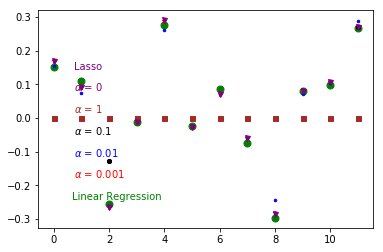

In [139]:
plt.plot(x_index, reg.coef_,linestyle='none',marker='o',markersize=7,color='green')
plt.plot(x_index, np.reshape(coeff1,[1,12]),linestyle='none',marker='*',markersize=5,color='red', zorder=7)

plt.plot(x_index, np.reshape(coeff2,[1,12]),linestyle='none',marker='.',markersize=5,color='blue', zorder=7)

plt.plot(x_index, np.reshape(coeff3,[1,12]),linestyle='none',marker='8',markersize=5,color='black', zorder=7)
plt.plot(x_index, np.reshape(coeff4,[1,12]),linestyle='none',marker='s',markersize=5,color='brown', zorder=7)

plt.plot(x_index, np.reshape(coeff0,[1,12]),linestyle='none',marker='v',markersize=5,color='purple', zorder=7)


plt.text(0.001, -0.05, 'Linear Regression',
         color='green',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)

plt.text(0.005, 0,'$\u03B1$ = 0.001',
          color='red',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)

plt.text(0.005, 0.05,'$\u03B1$ = 0.01',
          color='blue',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.text(0.005, 0.1,'$\u03B1$ = 0.1',
          color='black',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.text(0.005, 0.15,'$\u03B1$ = 1',
          color='brown',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.text(0.005, 0.2,'$\u03B1$ = 0',
          color='purple',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)
plt.text(0.005, 0.25,'Lasso',
          color='purple',
     horizontalalignment='left',
     verticalalignment='bottom',
     transform = ax.transAxes)

plt.show()